In [333]:
import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import forecast_arima
reload(forecast_arima)
from forecast_arima import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
dfHolidays=pd.read_csv(path+f"\\holidays.csv")
iOoS=28
data=pd.read_pickle(Y_path)
data_eval=pd.read_pickle(Y_path_eval)



### TEMPORAL

In [295]:
tree=Tree( data= data , type='spatial') 
tree_true=Tree(data=data_eval , type='spatial')
# tree.forecast_Prophet(iOoS=28)
# tree.reconcile('ols')


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


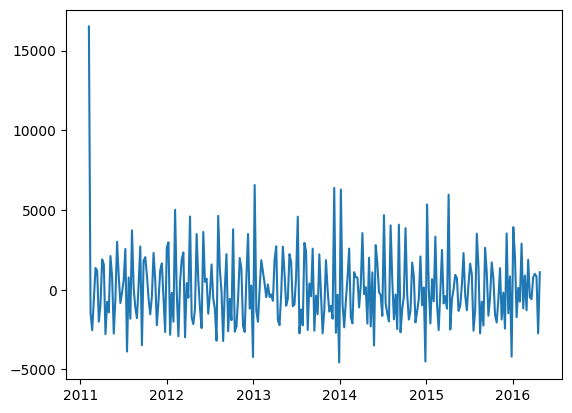

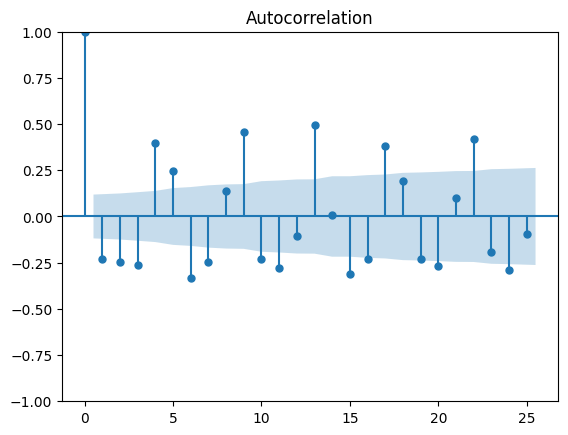

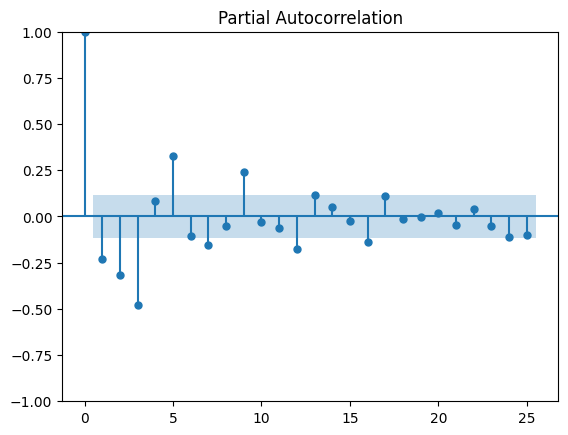

In [ ]:
leaf=4
srData=pd.Series(data=tree.mY[leaf], index=tree.date_time_index)
srData=srData.resample('W').sum()
plt.plot(srData)
plot_acf(srData)
plot_pacf(srData)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
leaf=0
srData=pd.Series(data=tree.mY[leaf], index=tree.date_time_index)
acf(srData,nlags=10)
srData_true=pd.Series(data=tree_true.mY[leaf], index=tree_true.date_time_index)

treeSr=Tree(srData,type='temporal')
# treeSr.forecast_Prophet(iOoS=28)



['W', 'D']


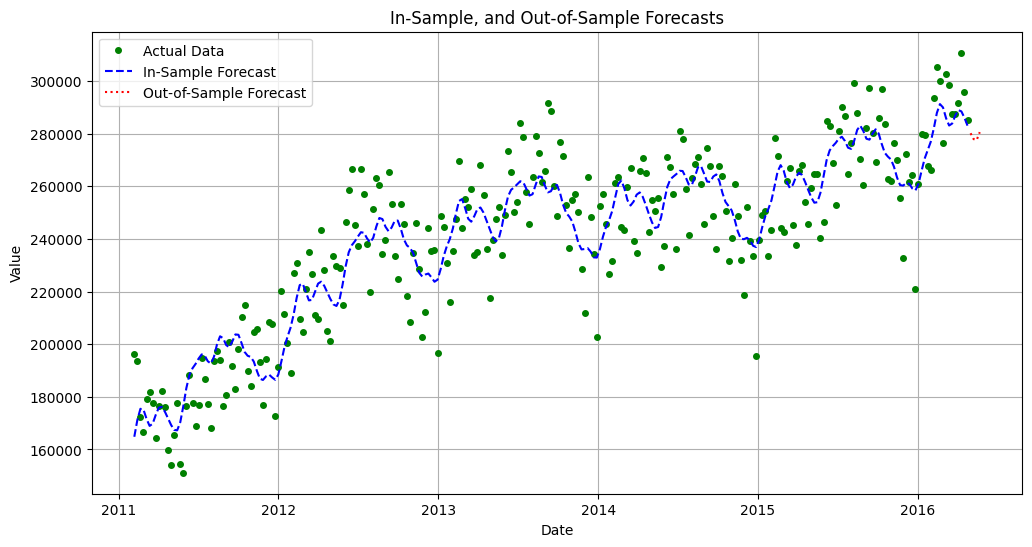

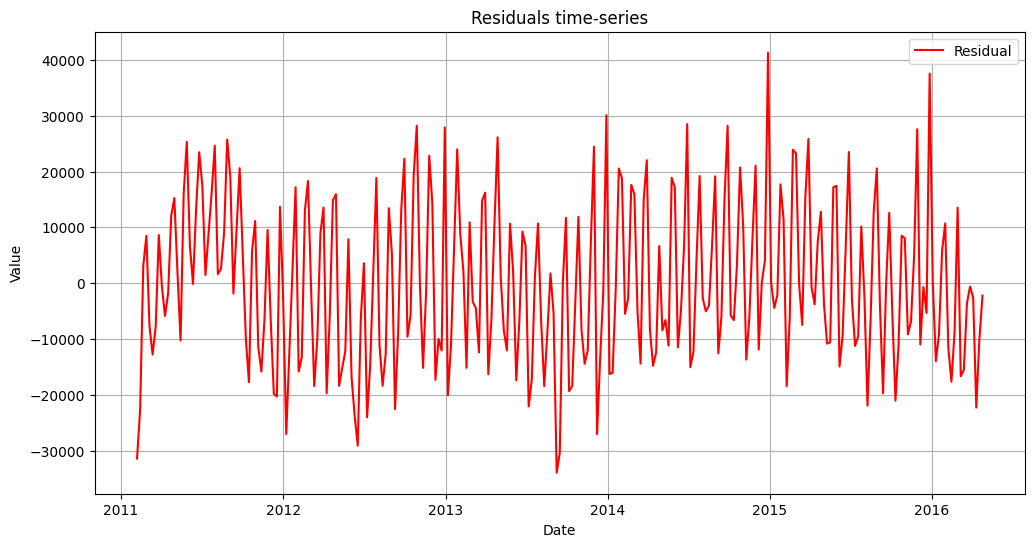

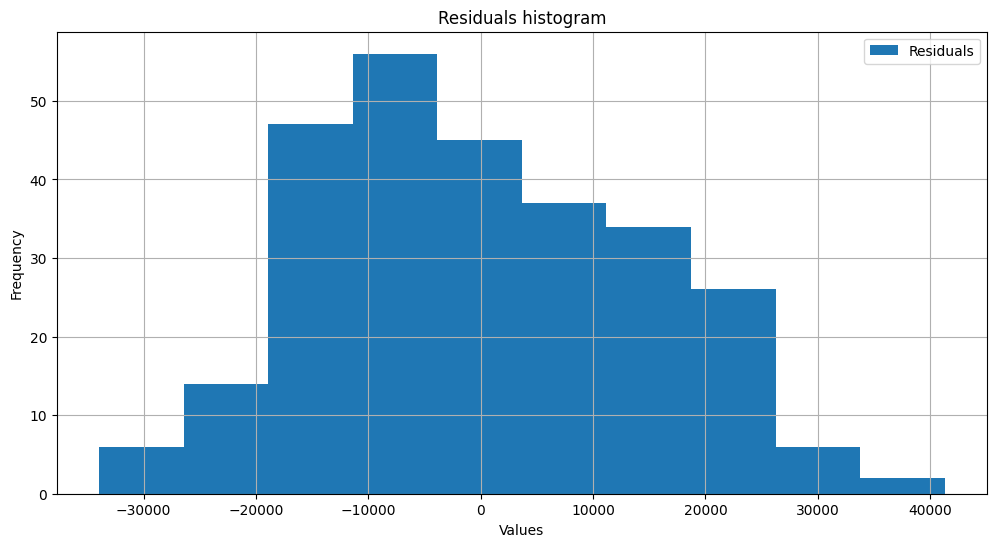

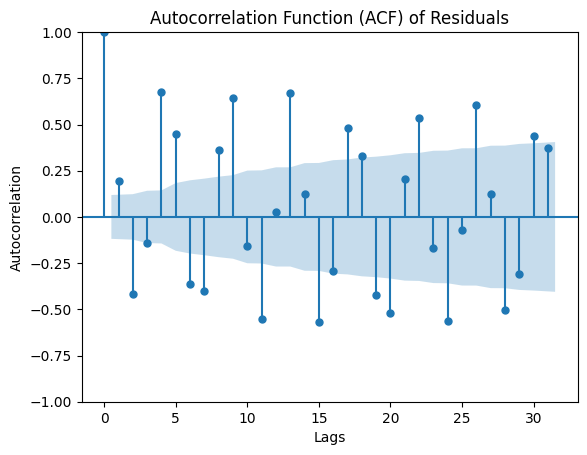

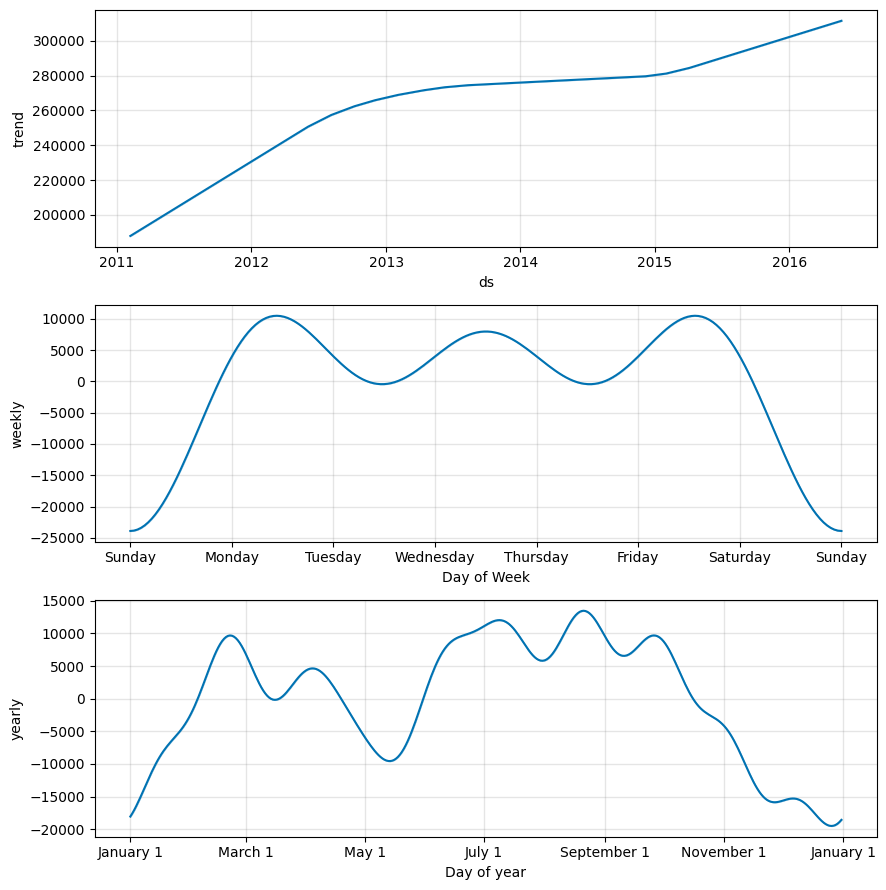

In [311]:
treeSr.dForecasters[0].plot_prediction(inSample=True)

In [303]:
treeSr.reconcile('mint_acov')

Reconciliation is complete


In [307]:
srData_true.values

array([38793., 35487., 34445., 34732., 42896., 50429., 53032., 43181.,
       44314., 39601., 40763., 43805., 54239., 45609., 46400., 39379.,
       42248., 40503., 44073., 54308., 59921., 42362., 38777., 37096.,
       36963., 42552., 51518., 54338.])

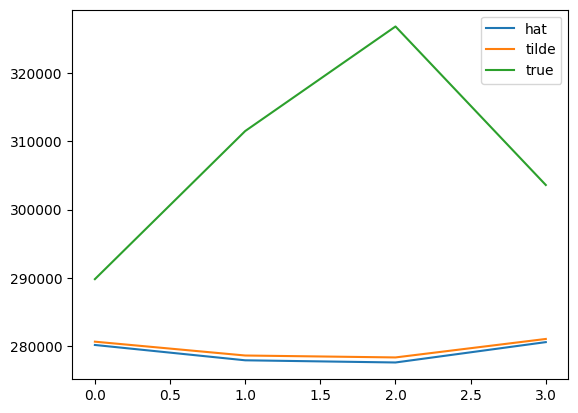

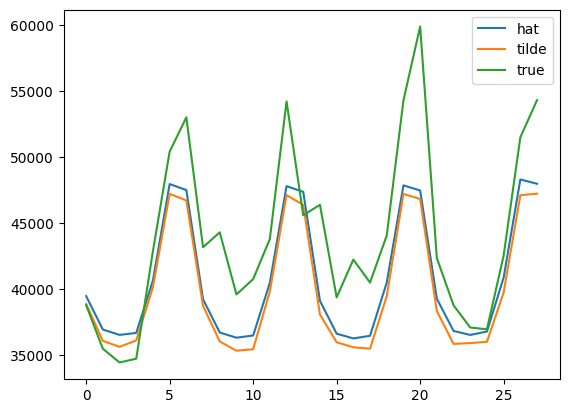

In [308]:
plt.plot(treeSr.mYhat[0,:],label='hat')
plt.plot(treeSr.mYtilde[0,:],label='tilde')
plt.plot(srData_true.resample('W').sum().values, label='true')
plt.legend()
plt.show()
plt.plot(treeSr.mYhat[1:,:].flatten(),label='hat')
plt.plot(treeSr.mYtilde[1:,:].flatten(),label='tilde')
plt.plot(srData_true.values, label='true')
plt.legend()
plt.show()

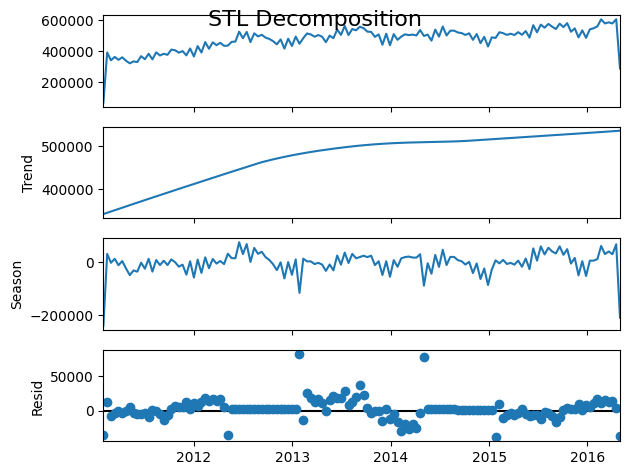

In [23]:
stl = STL(sr, seasonal=23)
result = stl.fit()

# Plot STL decomposition
result.plot()
plt.suptitle("STL Decomposition", fontsize=16)
plt.show()